<a href="https://colab.research.google.com/github/GroverAruquipa/Works_Aprendizaje_estadistico_UBA/blob/main/Practice1_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LInks:https://rpubs.com/Rortizdu/140148
https://www.statmethods.net/stats/rdiagnostics.html
https://rpubs.com/Joaquin_AR/226291
https://advstats.psychstat.org/book/mregression/index.php
https://bookdown.org/ripberjt/labbook/multivariable-linear-regression.html



**Practica_1**

In [54]:
install.packages("googledrive")

install.packages("Hmisc")


install.packages("corrplot")
install.packages("data.table")    
install.packages("GGally")     
install.packages("gridExtra")                                  # Install data.table
install.packages("car")  


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [55]:
library("googledrive")                            # Install data.table
library("Hmisc")

library("data.table")
library(corrplot)
library(ggplot2)
library(tidyverse)
library(broom)
library(GGally)

In [56]:
install.packages("devtools")
install.packages("predict3d")
require(predict3d)
require(rgl)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gdtools’, ‘flextable’, ‘ztable’, ‘moonBook’


Warning message in install.packages("predict3d"):
“installation of package ‘gdtools’ had non-zero exit status”
Warning message in install.packages("predict3d"):
“installation of package ‘flextable’ had non-zero exit status”
Warning message in install.packages("predict3d"):
“installation of package ‘ztable’ had non-zero exit status”
Warning message in install.packages("predict3d"):
“installation of package ‘moonBook’ had non-zero exit status”
Warning message in install.packages("predict3d"):
“installation of package ‘predict3d’ had non-zero exit status”
Loading required package: predict3d

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘predict3d’”



# 1.- Calcular la matriz de correlacion

In [57]:

mydata = read.csv("cemento.csv", header = TRUE, fileEncoding="latin1")
mydata <- fread("cemento.csv",  # Import columns
                      select = c("x1", "x2","x3", "x4","x5","y"))

mydata.cor = cor(mydata)

In [58]:
mydata.rcorr = rcorr(as.matrix(mydata))
mydata.rcorr

      x1    x2    x3    x4    x5     y
x1  1.00 -0.84 -0.24  0.14 -0.35 -0.64
x2 -0.84  1.00  0.33 -0.34  0.34  0.76
x3 -0.24  0.33  1.00 -0.98  0.21  0.85
x4  0.14 -0.34 -0.98  1.00 -0.22 -0.83
x5 -0.35  0.34  0.21 -0.22  1.00  0.33
y  -0.64  0.76  0.85 -0.83  0.33  1.00

n= 14 


P
   x1     x2     x3     x4     x5     y     
x1        0.0002 0.3995 0.6210 0.2176 0.0129
x2 0.0002        0.2444 0.2306 0.2313 0.0014
x3 0.3995 0.2444        0.0000 0.4636 0.0001
x4 0.6210 0.2306 0.0000        0.4439 0.0002
x5 0.2176 0.2313 0.4636 0.4439        0.2533
y  0.0129 0.0014 0.0001 0.0002 0.2533       

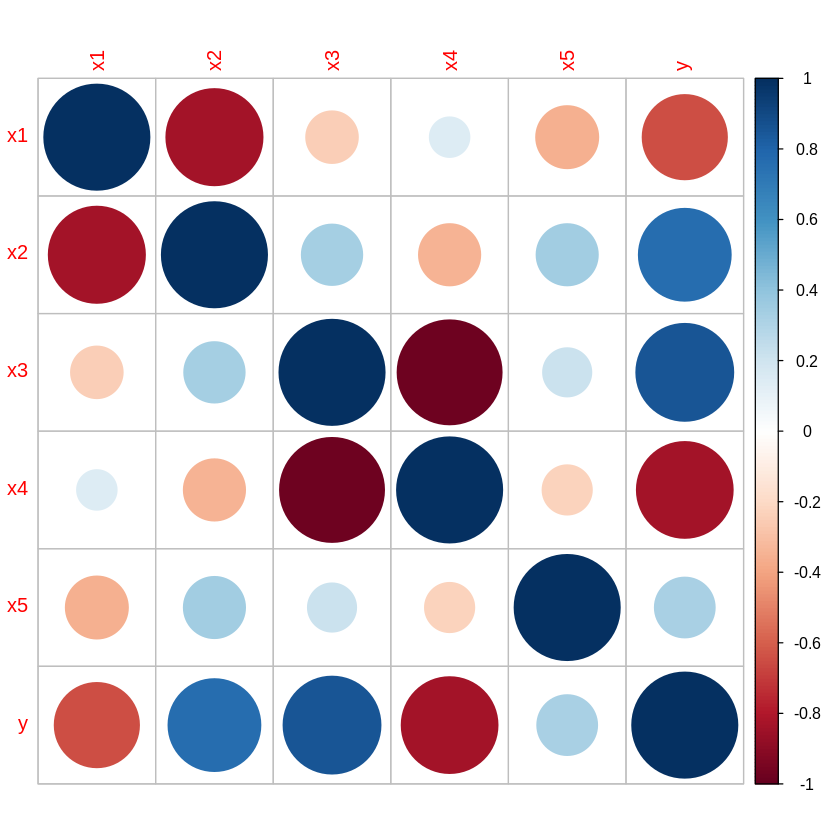

In [59]:
corrplot(mydata.cor)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



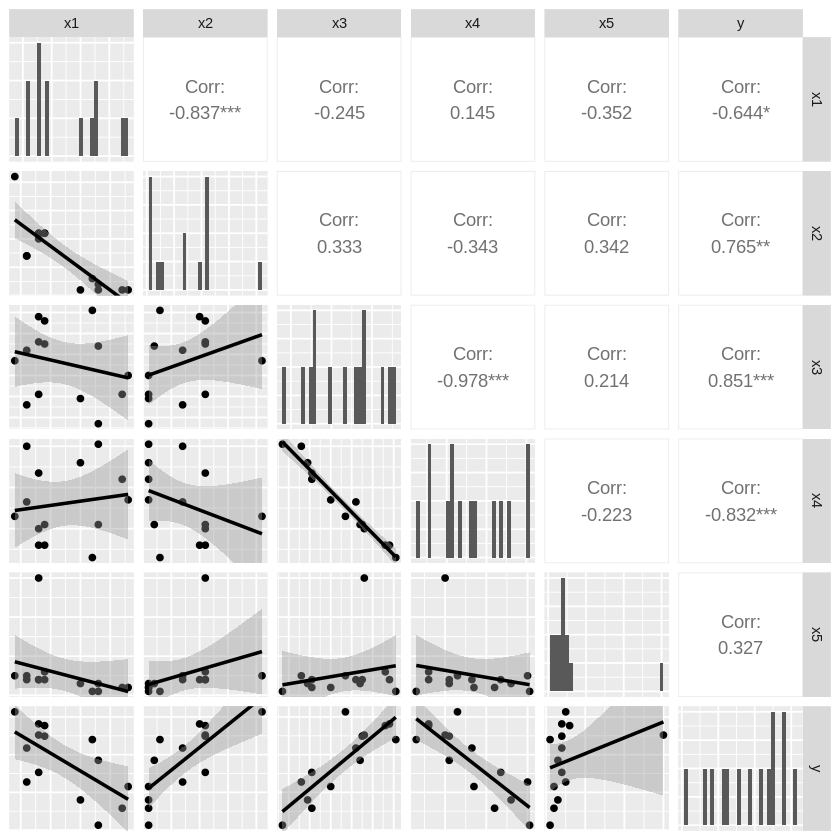

In [60]:
library(GGally)
ggpairs(mydata, lower = list(continuous = "smooth"),
        diag = list(continuous = "barDiag"), axisLabels = "none")

De la matriz de correlacion se puede indicar que:
Las variables con mayor correlacion respecto a **Y** es *x4* con 0.832 y *x3* con 0.851.
De igual froma las variables *x3* y *x4* tiene una alta correlacion de 0.978 lo que indica que puede ser simplificado en una sola en un futuro.


# 2.- Multiple linear regression

In [62]:
library(tidyverse)

In [66]:
modelo <- lm(y ~ x1 + x2 + x3+x4+x5, data=mydata)
#modelo <- lm(formula= y ~ x1 + x2 + x3+x4+x5, mydata)

summary(modelo)


Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5, data = mydata)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.58166 -2.17473 -0.05122  1.84522  3.11955 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  73.6101   105.9653   0.695    0.507
x1           -0.4497     1.1312  -0.398    0.701
x2            1.2995     1.0660   1.219    0.258
x3            0.5630     1.0587   0.532    0.609
x4           -0.1704     1.0494  -0.162    0.875
x5           -0.3859     1.5221  -0.254    0.806

Residual standard error: 2.7 on 8 degrees of freedom
Multiple R-squared:  0.9871,	Adjusted R-squared:  0.979 
F-statistic: 122.2 on 5 and 8 DF,  p-value: 2.48e-07


**TEST DE SIGNIFICANCIA a partir del p value**

*Test hypotesis B0*

In [97]:
N=14
beduc<-coef(modelo)["(Intercept)"]
beduc
# Desviación estándar del coeficiente
mvc <- vcov(modelo)
dsbeta1<-sqrt(mvc[2,2])
dsbeta1
# t calculado
tc<-beduc/dsbeta1
tc
# T tabla
glb <- N-length(coef(modelo))
alpha<-0.05
tt <- qt(1-alpha/2, glb)
 #Se rechaza la hipótesis nula si: abs(tc)>abs(tt)
paste("Rechazamos H0?", abs(tc)>abs(tt))
p.valor <- 2*(1-pt(abs(tc), glb))
p.valor ## VALOR PARA RECHAZAR O ACEPTAR LA HYPOTHESIS DE 5%
tc
tt

(Intercept) 
   73.61009

[1] 1.131229

(Intercept) 
   65.07092

[1] "Rechazamos H0? TRUE"

(Intercept) 
3.460787e-12

(Intercept) 
   65.07092

[1] 2.306004

In [98]:
p.valor <- 2*(1-pt(abs(tc), glb))
p.valor ## VALOR PARA RECHAZAR O ACEPTAR LA HYPOTHESIS DE 5%

(Intercept) 
3.460787e-12

*Test hypotesis B1*

In [99]:
N=14
beduc<-coef(modelo)["x1"]
beduc
# Desviación estándar del coeficiente
mvc <- vcov(modelo)
dsbeta1<-sqrt(mvc[2,2])
dsbeta1
# t calculado
tc<-beduc/dsbeta1
tc
# T tabla
glb <- N-length(coef(modelo))
alpha<-0.05
tt <- qt(1-alpha/2, glb)
 #Se rechaza la hipótesis nula si: abs(tc)>abs(tt)
paste("Rechazamos H0?", abs(tc)>abs(tt))
tc
tt
p.valor <- 2*(1-pt(abs(tc), glb))
p.valor ## VALOR PARA RECHAZAR O ACEPTAR LA HYPOTHESIS DE 5%


x1 
-0.4497298

[1] 1.131229

x1 
-0.3975587

[1] "Rechazamos H0? FALSE"

x1 
-0.3975587

[1] 2.306004

x1 
0.7013526

In [100]:
p.valor <- 2*(1-pt(abs(tc), glb))
p.valor ## VALOR PARA RECHAZAR O ACEPTAR LA HYPOTHESIS DE 5%

x1 
0.7013526

*Test hypotesis B2*

In [93]:
N=14
beduc<-coef(modelo)["x2"]
beduc
# Desviación estándar del coeficiente
mvc <- vcov(modelo)
dsbeta1<-sqrt(mvc[2,2])
dsbeta1
# t calculado
tc<-beduc/dsbeta1
tc
# T tabla
glb <- N-length(coef(modelo))
alpha<-0.05
tt <- qt(1-alpha/2, glb)
 #Se rechaza la hipótesis nula si: abs(tc)>abs(tt)
paste("Rechazamos H0?", abs(tc)>abs(tt))
tc
tt
p.valor <- 2*(1-pt(abs(tc), glb))
p.valor ## VALOR PARA RECHAZAR O ACEPTAR LA HYPOTHESIS DE 5%


x2 
1.299514

[1] 1.131229

x2 
1.148763

[1] "Rechazamos H0? FALSE"

x2 
1.148763

[1] 2.306004

x2 
0.2838393

*Test hypotesis B3*

In [94]:
N=14
beduc<-coef(modelo)["x3"]
beduc
# Desviación estándar del coeficiente
mvc <- vcov(modelo)
dsbeta1<-sqrt(mvc[2,2])
dsbeta1
# t calculado
tc<-beduc/dsbeta1
tc
# T tabla
glb <- N-length(coef(modelo))
alpha<-0.05
tt <- qt(1-alpha/2, glb)
 #Se rechaza la hipótesis nula si: abs(tc)>abs(tt)
paste("Rechazamos H0?", abs(tc)>abs(tt))
tc
tt
p.valor <- 2*(1-pt(abs(tc), glb))
p.valor ## VALOR PARA RECHAZAR O ACEPTAR LA HYPOTHESIS DE 5%


x3 
0.5630103

[1] 1.131229

x3 
0.4976981

[1] "Rechazamos H0? FALSE"

x3 
0.4976981

[1] 2.306004

x3 
0.6320871

*Test hypotesis B4*

In [95]:
N=14
beduc<-coef(modelo)["x4"]
beduc
# Desviación estándar del coeficiente
mvc <- vcov(modelo)
dsbeta1<-sqrt(mvc[2,2])
dsbeta1
# t calculado
tc<-beduc/dsbeta1
tc
# T tabla
glb <- N-length(coef(modelo))
alpha<-0.05
tt <- qt(1-alpha/2, glb)
 #Se rechaza la hipótesis nula si: abs(tc)>abs(tt)
paste("Rechazamos H0?", abs(tc)>abs(tt))
tc
tt
p.valor <- 2*(1-pt(abs(tc), glb))
p.valor ## VALOR PARA RECHAZAR O ACEPTAR LA HYPOTHESIS DE 5%


x4 
-0.1703864

[1] 1.131229

x4 
-0.1506206

[1] "Rechazamos H0? FALSE"

x4 
-0.1506206

[1] 2.306004

x4 
0.8840035

*Test hypotesis B5*

In [91]:
N=14
beduc<-coef(modelo)["x5"]
beduc
# Desviación estándar del coeficiente
mvc <- vcov(modelo)
dsbeta1<-sqrt(mvc[2,2])
dsbeta1
# t calculado
tc<-beduc/dsbeta1
tc
# T tabla
glb <- N-length(coef(modelo))
alpha<-0.05
tt <- qt(1-alpha/2, glb)
 #Se rechaza la hipótesis nula si: abs(tc)>abs(tt)
paste("Rechazamos H0?", abs(tc)>abs(tt))
tc
tt
p.valor <- 2*(1-pt(abs(tc), glb))
p.valor ## VALOR PARA RECHAZAR O ACEPTAR LA HYPOTHESIS DE 5%


x5 
-0.3859092

[1] 1.131229

x5 
-0.3411416

[1] "Rechazamos H0? FALSE"

x5 
-0.3411416

[1] 2.306004

x5 
0.7417838

In [81]:
beduc

<NA> 
  NA

In [ ]:
plot(fit)

El modelo de regresion lineal es capaz de explicar el 98.71% de la variabilidad observada. EL P-VALUE de 2.48e-07 es altamente significtivo por lo que se puede acpetar que el modelo no es al azar

# SELECCIONAR EL MEJOR MODELO

In [103]:
step(object = modelo, direction = "both", trace = 1)

Start:  AIC=31.98
y ~ x1 + x2 + x3 + x4 + x5

       Df Sum of Sq    RSS    AIC
- x4    1    0.1922 58.516 30.023
- x5    1    0.4687 58.792 30.089
- x1    1    1.1523 59.476 30.251
- x3    1    2.0618 60.385 30.464
<none>              58.323 31.977
- x2    1   10.8348 69.158 32.363

Step:  AIC=30.02
y ~ x1 + x2 + x3 + x5

       Df Sum of Sq     RSS    AIC
- x5    1      0.28   58.79 28.090
<none>                58.52 30.023
- x1    1     11.22   69.73 30.479
+ x4    1      0.19   58.32 31.977
- x2    1    274.60  333.12 52.372
- x3    1   1791.78 1850.29 76.377

Step:  AIC=28.09
y ~ x1 + x2 + x3

       Df Sum of Sq     RSS    AIC
<none>                58.79 28.090
- x1    1     10.95   69.74 28.480
+ x5    1      0.28   58.52 30.023
+ x4    1      0.00   58.79 30.089
- x2    1    274.56  333.36 50.382
- x3    1   1813.38 1872.17 74.541



Call:
lm(formula = y ~ x1 + x2 + x3, data = mydata)

Coefficients:
(Intercept)           x1           x2           x3  
    55.8768      -0.2637       1.4653       0.7336  


Segun este analisis el mejor modelo es:

In [104]:
modelo <- (lm(formula = y ~ x1 + x2 + x3 
              , data = mydata))
summary(modelo)


Call:
lm(formula = y ~ x1 + x2 + x3, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6827 -2.0225 -0.0239  1.7402  3.3238 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 55.87675    3.97307  14.064 6.48e-08 ***
x1          -0.26371    0.19328  -1.364    0.202    
x2           1.46531    0.21442   6.834 4.55e-05 ***
x3           0.73362    0.04177  17.562 7.62e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.425 on 10 degrees of freedom
Multiple R-squared:  0.987,	Adjusted R-squared:  0.9831 
F-statistic: 252.5 on 3 and 10 DF,  p-value: 1.011e-09


In [106]:
modelo2 <- (lm(formula = y ~ 0+x1 + x2 + x3 
              , data = mydata))
summary(modelo2)


Call:
lm(formula = y ~ 0 + x1 + x2 + x3, data = mydata)

Residuals:
   Min     1Q Median     3Q    Max 
-8.334 -6.519 -1.044  4.513 22.247 

Coefficients:
   Estimate Std. Error t value Pr(>|t|)    
x1   2.1127     0.4078   5.180 0.000304 ***
x2   3.7329     0.6144   6.076 8.01e-05 ***
x3   0.9403     0.1700   5.533 0.000177 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.54 on 11 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9885 
F-statistic:   402 on 3 and 11 DF,  p-value: 1.612e-11


De esta forma los intervalos de confianza para este modelo es:

In [105]:
confint(lm(formula = y ~ x1 + x2 + x3
            , data = mydata))

,2.5 %,97.5 %
(Intercept),47.0241980,64.7293052
x1,-0.6943546,0.1669332
x2,0.9875460,1.9430789
x3,0.6405471,0.8266983


**Validacion de condiciones para la regresion multiple**

In [ ]:
library(ggplot2)
library(gridExtra)
plot1 <- ggplot(data = mydata, aes(x1, modelo$residuals)) +
    geom_point() + geom_smooth(color = "firebrick") + geom_hline(yintercept = 0) +
    theme_bw()
plot2 <- ggplot(data = mydata, aes(x2, modelo$residuals)) +
    geom_point() + geom_smooth(color = "firebrick") + geom_hline(yintercept = 0) +
    theme_bw()
plot3 <- ggplot(data = mydata, aes(x3, modelo$residuals)) +
    geom_point() + geom_smooth(color = "firebrick") + geom_hline(yintercept = 0) +
    theme_bw()
plot4 <- ggplot(data = mydata, aes(x4, modelo$residuals)) +
    geom_point() + geom_smooth(color = "firebrick") + geom_hline(yintercept = 0) +
    theme_bw()
grid.arrange(plot1, plot2, plot3, plot4)

# HIPTOTESIS TESTING

*INdividual regression*

In [ ]:
t<- -0.449/1.1312
2*(1-pt(t, 96))

*Testing with F *

In [ ]:
F <- (12 - 5 -1)/5*0.3997/(1-0.9871)
1 - pf(F, 5, 12)

In [ ]:
library(GGally)
ggpairs(datos, lower = list(continuous = "smooth"),
        diag = list(continuous = "barDiag"), axisLabels = "none")

# 3.- Suma de las 5 covariables

In [ ]:
Datos <- fread("cemento.csv",  # Import columns
                      select = c("x1", "x2","x3", "x4","x5"))

Datos

In [ ]:
Datos$NumPatatasTotal = rowSums (Datos)
Datos$NumPatatasTotal


En funcion a la suma de variables se observa que x3 y x4 tienen o deberian tener un mayor impacto en el modelo, respecto a las demas variables del modelo.

In [ ]:
aux1=data.frame(Datos$NumPatatasTotal)



# 4. Realizar un nuevo ajuste lineal usando las 5 variables independientes y eliminando la intercept. ¿C´omo se comparan estos resultados con los obtenidos anteriormente? ¿Cu´ales son
significativamente distintos de 0?

In [107]:
 modelo_noIct <- lm(y ~ 0+ x1 + x2 + x3+x4+x5, data=mydata)
 summary(modelo_noIct )


Call:
lm(formula = y ~ 0 + x1 + x2 + x3 + x4 + x5, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1390 -1.9789  0.1514  1.5559  3.9401 

Coefficients:
   Estimate Std. Error t value Pr(>|t|)    
x1  0.32652    0.17086   1.911   0.0883 .  
x2  2.02517    0.20611   9.826 4.14e-06 ***
x3  1.29718    0.05993  21.646 4.52e-09 ***
x4  0.55768    0.05039  11.067 1.53e-06 ***
x5  0.35444    1.05496   0.336   0.7446    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.621 on 9 degrees of freedom
Multiple R-squared:  0.9995,	Adjusted R-squared:  0.9993 
F-statistic:  3933 on 5 and 9 DF,  p-value: 9.691e-15


In [ ]:
require(ggiraph)
require(ggiraphExtra)
require(plyr)

In [ ]:
ggPredict(modelo_noIct,interactive = TRUE)


# 5. Plantear un nuevo modelo en el que intervengan aquellas variables que contribuyen significativamente y estimar los par´ametros por m´ınimos cuadrados. ¿Qu´e modelo eligir´ıa finalmente?